In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
# settings
data1 = 5
data2 = 7
eps = 0.2
lmd_1 = 0.3
lmd_2 = 0.02
lr = 0.01
batch_size = 128
img_size = 28
crop_size = 26
epochs = 10

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


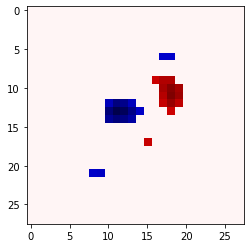

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=False)
digit5 = mnist.train.images[mnist.train.labels==data1]
digit7 = mnist.train.images[mnist.train.labels==data2]

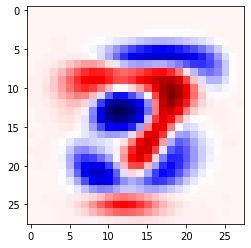

In [39]:
mean5 = np.mean(digit5,0)
mean7 = np.mean(digit7,0)
corr = (mean7.reshape(28,28)-mean5.reshape(28,28))/2
# corr[abs(corr)<eps]=0
plt.imshow(corr,cmap='seismic')
plt.show()

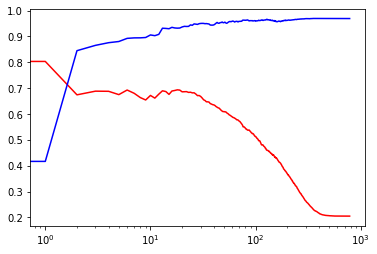

In [42]:
y_5 = np.array([-1]*len(digit5))
y_7 = np.array([1]*len(digit7))

corr = corr.flatten()
idx = np.argsort(abs(corr))[::-1]
robust_acc = []
clean_acc = []
w_ = np.zeros_like(corr)


for p in range(img_size*img_size):
    w_[idx[p]] = corr[idx[p]]
    acc_5 = y_5 * np.matmul(digit5, w_) - eps*sum(abs(w_))
    acc_7 = y_7 * np.matmul(digit7, w_) - eps*sum(abs(w_))
    if sum(acc_7>0) == 0:
        test_acc = sum(acc_5>0)/len(digit5)
    else:
        test_acc = (sum(acc_5>0) + sum(acc_7>0))/(len(digit5)+len(digit7))
    robust_acc.append(test_acc)
    
    acc_5 = y_5 * np.matmul(digit5, w_)
    acc_7 = y_7 * np.matmul(digit7, w_)
    if sum(acc_7>0) == 0:
        test_acc = sum(acc_5>0)/len(digit5)
    else:
        test_acc = (sum(acc_5>0) + sum(acc_7>0))/(len(digit5)+len(digit7))
    clean_acc.append(test_acc)

plt.semilogx(robust_acc, 'r')
plt.semilogx(clean_acc, 'b')

plt.show()

In [43]:
# get robustness from adversarial training
w_at = corr.copy()
w_at[abs(w_at)<eps]=0
w_at[w_at>0] -= eps
w_at[w_at<0] += eps
acc_5 = y_5 * np.matmul(digit5, w_at) - eps*sum(abs(w_))
acc_7 = y_7 * np.matmul(digit7, w_at) - eps*sum(abs(w_))
test_acc = (sum(acc_5>0) + sum(acc_7>0))/(len(digit5)+len(digit7))
print(test_acc)

0.0


In [ ]:
# y_5 = np.array([-1]*len(digit5))
# y_7 = np.array([1]*len(digit7))
# 
# corr = corr.flatten()
# corr_p = corr.copy()
# corr_p[corr_p<0]=0
# corr_n = corr.copy()
# corr_n[corr_n>0]=0
# idx_p = np.argsort(abs(corr_p))[::-1]
# idx_n = np.argsort(abs(corr_n))[::-1]
# robust_acc = []
# w_ = np.zeros_like(corr)
# 
# 
# for i in range(int(img_size*img_size/2)):
#     w_[idx_p[i]] = corr_p[idx_p[i]]
#     w_[idx_n[i]] = corr_n[idx_n[i]]
#     acc_5 = y_5 * np.matmul(digit5, w_) - eps*sum(abs(w_))
#     acc_7 = y_7 * np.matmul(digit7, w_) - eps*sum(abs(w_))
#     test_acc = (sum(acc_5>0) + sum(acc_7>0))/(len(digit5)+len(digit7))
#     robust_acc.append(test_acc)
#     robust_acc.append(test_acc)
# plt.semilogx(robust_acc, 'r--')
# plt.show()